In [58]:
#Cargar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score 

In [2]:
#Lectura de Datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
#Realizamos lectura de los dátos para el análisis exploratorio
print(Datos.head(40))


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    69    1   0       160   234    1        2      131      0      0.1   
1    69    0   0       140   239    0        0      151      0      1.8   
2    66    0   0       150   226    0        0      114      0      2.6   
3    65    1   0       138   282    1        2      174      0      1.4   
4    64    1   0       110   211    0        2      144      1      1.8   
5    64    1   0       170   227    0        2      155      0      0.6   
6    63    1   0       145   233    1        2      150      0      2.3   
7    61    1   0       134   234    0        0      145      0      2.6   
8    60    0   0       150   240    0        0      171      0      0.9   
9    59    1   0       178   270    0        2      145      0      4.2   
10   59    1   0       170   288    0        2      159      0      0.2   
11   59    1   0       160   273    0        2      125      0      0.0   
12   59    1   0       13

In [4]:
#Descripci+on de los Datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
# Configuración de los gráficos
plt.style.use('ggplot')  
sns.set(style="whitegrid")

In [9]:
# Cargar los Datos
file_path = 'heart_cleveland_upload.csv'
Datos = pd.read_csv(file_path)

In [11]:
#Inspeccionar los Datos
print("Primeras filas del Dataframe:")
print (Datos.head())

print("\nInformación del Dataframe:")
print(Datos.info())

print("\nValores nulos en el Dataframe:")
print(Datos.isnull().sum())

Primeras filas del Dataframe:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  


In [12]:
#Resumen estadístico
print("\nResumen estadístico:")
print(Datos.describe())


Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std  

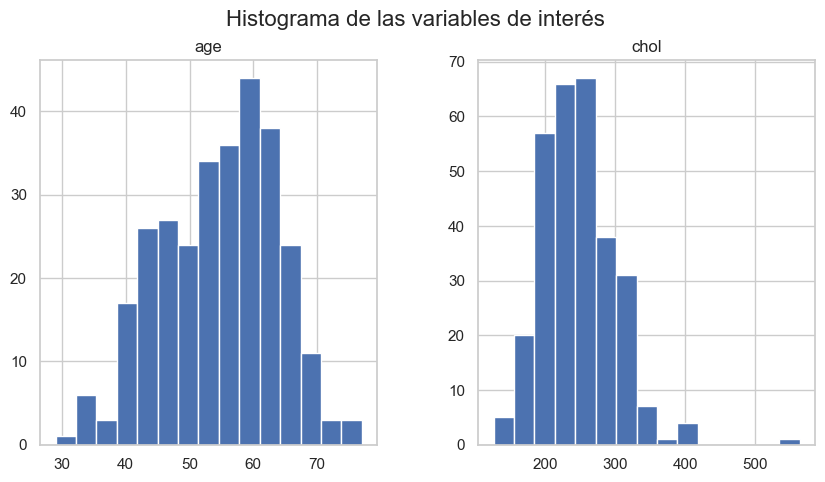

In [14]:
#Visualización: Histogramas de todas las variables numéricas (para las variables de interés)
Datos[['age', 'chol']].hist(bins=15, figsize=(10, 5)) #cambia 'age' y 'chol' por las variables que quieras analizar
plt.suptitle('Histograma de las variables de interés', fontsize=16)
plt.show()

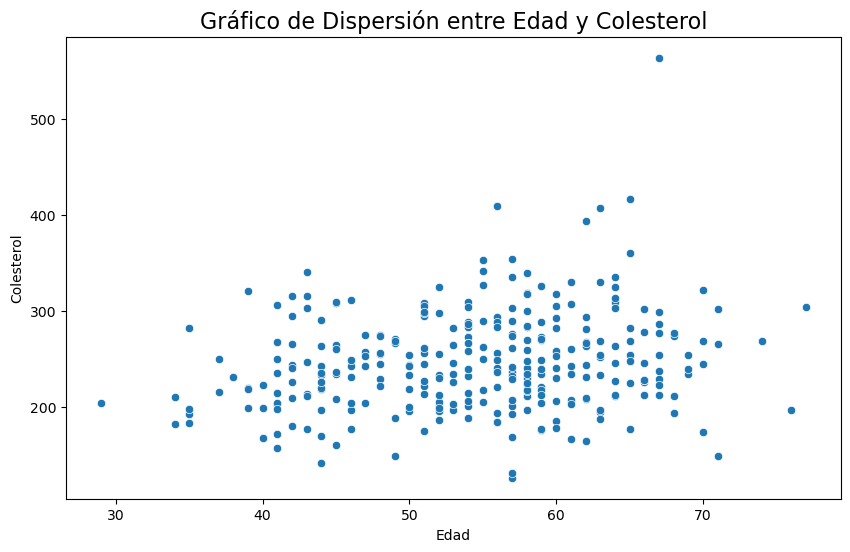

In [8]:

# Visualización: Gráfico de dispersión entre dos variables (por ejemplo: 'age' y 'chol')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Datos, x='age', y='chol')  # Usa 'Datos' como tu DataFrame
plt.title('Gráfico de Dispersión entre Edad y Colesterol', fontsize=16)
plt.xlabel('Edad')  # Agregar etiqueta al eje x
plt.ylabel('Colesterol')  # Agregar etiqueta al eje y
plt.show()  # Mostrar el gráfico


In [15]:
# Comprobar si hay registros duplicados
duplicates = Datos.duplicated().sum()
print(f"Registros duplicados: {duplicates}")


Registros duplicados: 0


In [16]:
# Eliminar duplicados si existen
if duplicates > 0:
    Datos = Datos.drop_duplicates()

In [17]:
# Transformación de variables categóricas
# Convertir 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' a tipo 'category'
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    Datos[col] = Datos[col].astype('category')

In [18]:
# Normalización/Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler

In [19]:
# Seleccionar las columnas numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

In [20]:
# Estandarizar las variables numéricas
Datos[numeric_columns] = scaler.fit_transform(Datos[numeric_columns])

In [21]:
# Visualización de la transformación (opcional)
print("Datos después del preprocesamiento:")
print(Datos.describe())


Datos después del preprocesamiento:
                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.196200e-16  5.024040e-16 -1.973730e-16  5.024040e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

        condition  
count  297.000000  
mean     0.461279  
std      0.499340  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [22]:
# Separar las características (X) y la variable objetivo (y)
X = Datos.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = Datos['condition']  # Variable objetivo

In [23]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Crear el modelo de Random Forest
model=RandomForestClassifier(random_state=42)

In [28]:
# Ajustar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
#Obtener la importancia de las características
importance = model.feature_importances_

In [33]:
#Crear un Dataframe para visualizar las importancias
feature_importances = pd.DataFrame({
    "Feature": X.columns,                   # Nombres de las características
    "Importance": importance                 # Importancias calculadas por el modelo
})

In [34]:
# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

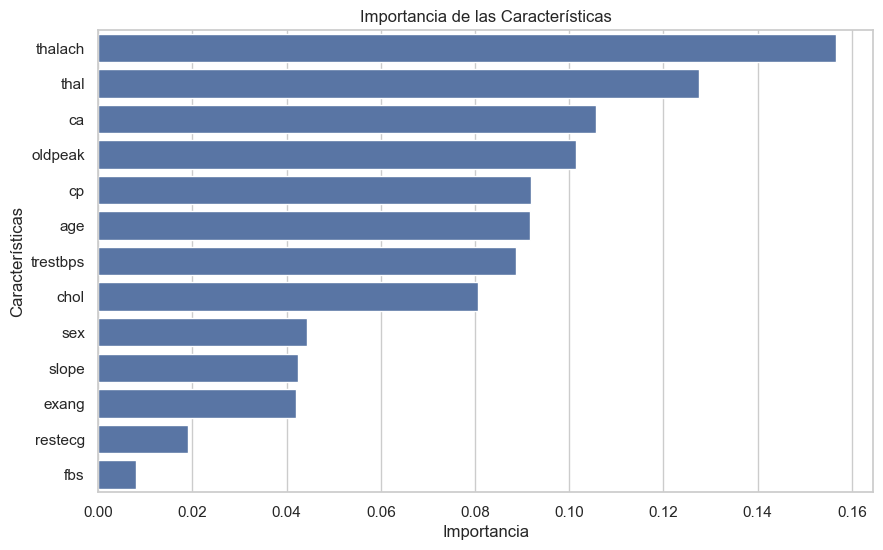

In [35]:
# Visualizar las importancias usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()
# Separar las características (X) y la variable objetivo (y)
X = Datos.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = Datos['condition']  # Variable objetivo

In [38]:
# Separar las características (X) y la variable objetivo (y)
X = Datos.drop('condition', axis=1)  # Todas las columnas menos 'condition'
y = Datos['condition']  # Variable objetivo

In [39]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Mostrar la forma de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (237, 13)
Tamaño del conjunto de prueba: (60, 13)


In [47]:
# Crear una instancia del modelo de Regresión Logística
model=LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [48]:
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [49]:
# Predecir las etiquetas para el conjunto de prueba
y_pred=model.predict(X_test)

In [50]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [51]:
print("Precisión del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)


Precisión del modelo: 0.7333333333333333

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [52]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [53]:
print("Precisión del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)

Precisión del modelo: 0.7333333333333333

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



<Figure size 800x600 with 0 Axes>

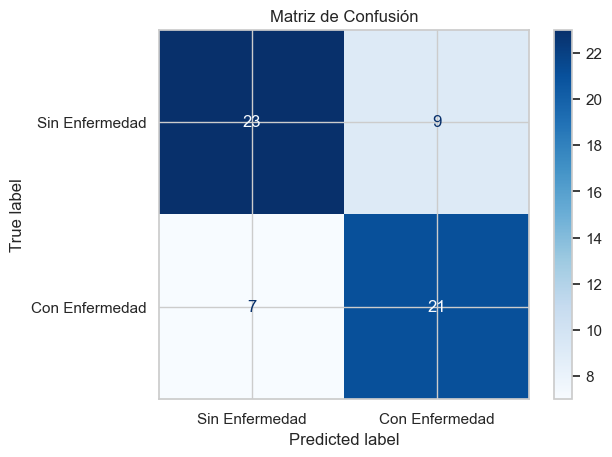

In [61]:
# 1. Matriz de Confusión 
y_pred = model.predict(X_test)  # Realizamos predicciones en el conjunto de prueba 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6)) 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin Enfermedad', 'Con Enfermedad']).plot(cmap='Blues') 
plt.title('Matriz de Confusión') 
plt.show()

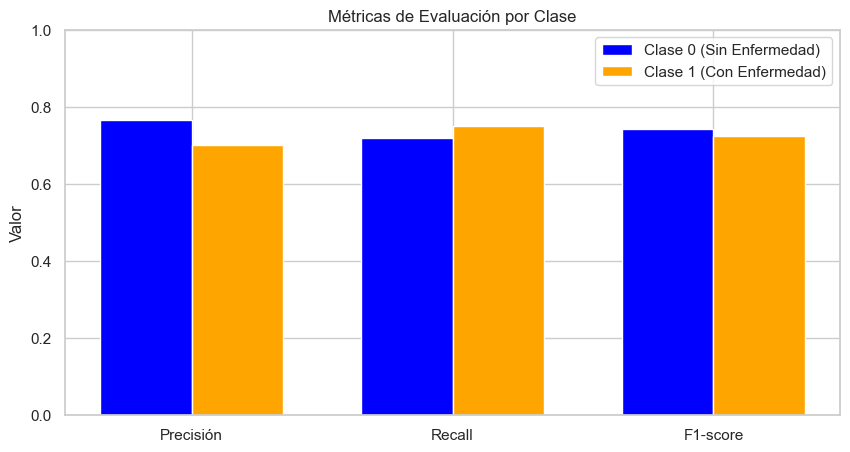

In [60]:
# 2. Gráfico de barras para las métricas de evaluación 
report = classification_report(y_test, y_pred, output_dict=True)  # Obtener métricas
values = [report['0']['precision'], report['0']['recall'], report['0']['f1-score']]  # Clase 0
values_1 = [report['1']['precision'], report['1']['recall'], report['1']['f1-score']]  # Clase 1

metrics = ['Precisión', 'Recall', 'F1-score'] 
bar_width = 0.35 
x = np.arange(len(metrics))  # El eje x 

plt.figure(figsize=(10, 5)) 
plt.bar(x - bar_width/2, values, bar_width, label='Clase 0 (Sin Enfermedad)', color='blue') 
plt.bar(x + bar_width/2, values_1, bar_width, label='Clase 1 (Con Enfermedad)', color='orange') 
plt.xticks(x, metrics) 
plt.ylim(0, 1) 
plt.ylabel('Valor') 
plt.title('Métricas de Evaluación por Clase') 
plt.legend() 
plt.show()

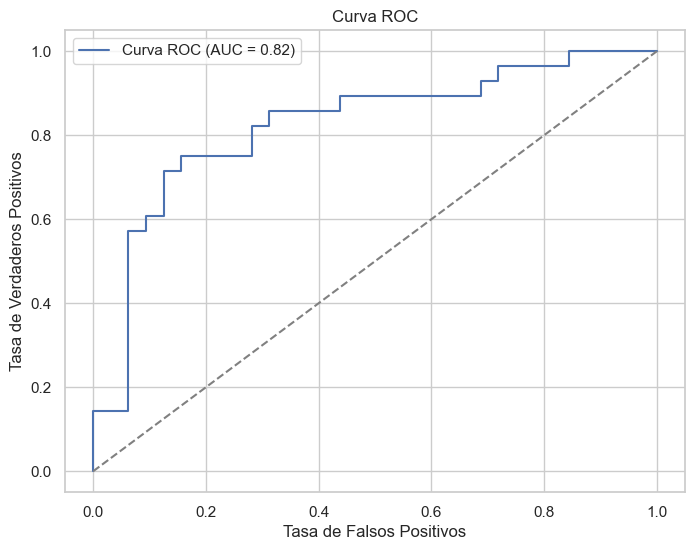

In [62]:
# 3. Curva ROC 
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = roc_auc_score(y_test, y_pred_proba) 

plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc)) 
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('Tasa de Falsos Positivos') 
plt.ylabel('Tasa de Verdaderos Positivos') 
plt.title('Curva ROC') 
plt.legend() 
plt.show() 

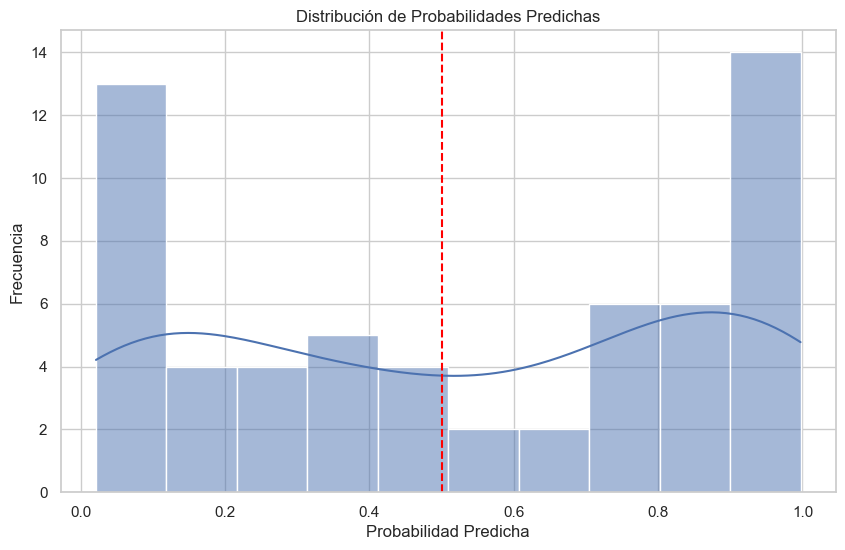

In [63]:
# 4. Gráfico de distribución de probabilidades 
plt.figure(figsize=(10, 6)) 
sns.histplot(y_pred_proba, bins=10, kde=True) 
plt.axvline(0.5, color='red', linestyle='--')  # Umbral de decisión 
plt.xlabel('Probabilidad Predicha') 
plt.ylabel('Frecuencia') 
plt.title('Distribución de Probabilidades Predichas') 
plt.show()